In [1]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# path of the file
file_path= 'D:/Liuuu/Graduate@UCSD/Intern/DS/CapitalOne/transactions/processed_transactions.csv'
transactions=pd.read_csv(file_path)
transactions.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False


In [5]:
## The Structure of the Data 
NumRecords = transactions.shape[0]
NumFields = transactions.shape[1]
print("Number of Fields in Each Record: %d" % NumFields)
print("Number of Records: %d" % NumRecords)

Number of Fields in Each Record: 29
Number of Records: 786363


In [11]:
### Number of unique accounts
len(transactions['accountNumber'].unique())

5000

In [12]:
### Number of unique customer
len(transactions['customerId'].unique())

5000

In [13]:
######## check if one customer has only one account
customers = transactions['customerId'].unique()
accounts = transactions['accountNumber'].unique()
comparison = accounts == customers
ifequal = comparison.all()
print(ifequal)

True


In [14]:
transactions['transactionAmount'].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

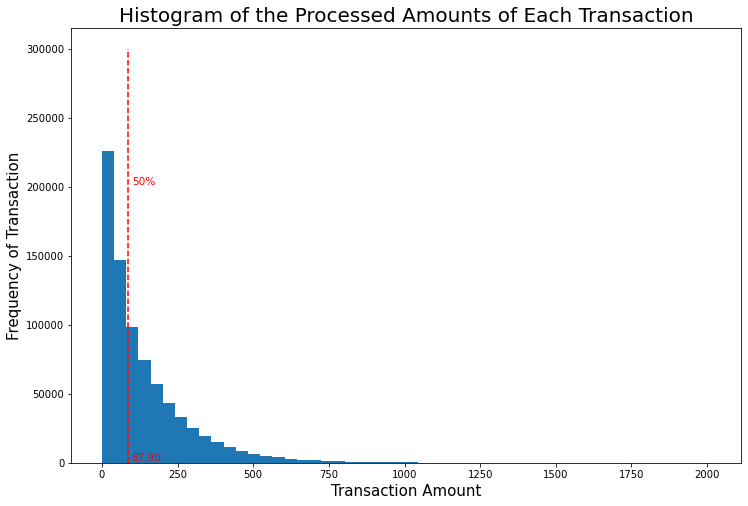

In [15]:
plt.figure(figsize=(12, 8))
plt.hist(transactions['transactionAmount'],50)
plt.plot([87.90, 87.90], [0, 300000], c='r', linestyle='--')
text = plt.text(87.90+50, 87.90+200000, '50%', ha='center', va='bottom', fontsize=10.5)
text.set_color('r')
text1 = plt.text(87.90+60, 87.90, '87.90', ha='center', va='bottom', fontsize=10.5)
text1.set_color('r')

plt.title('Histogram of the Processed Amounts of Each Transaction', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=15)
plt.ylabel('Frequency of Transaction', fontsize=15)
plt.show()

In [16]:
transactions.head(25)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
5,830329091,830329091,5000,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,01,fastfood,01/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
6,830329091,830329091,5000,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,fastfood,05/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
7,830329091,830329091,5000,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,01,fastfood,01/2021,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,NaN,US,02,01,fastfood,08/2032,2015-08-06,2015-08-06,885,885,3143,PURCHASE,9.37,True,False,False
9,830329091,830329091,5000,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,08,fastfood,04/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False


In [17]:
len(transactions['accountNumber'].unique())

5000

In [18]:
trancopy=transactions.copy() 
trancopy.drop_duplicates(subset=['accountNumber', 'cardLast4Digits'], keep='first', inplace=True)
trancopy.head()
# len(transactions['cardLast4Digits'].unique())

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
15,574788567,574788567,2500,2500.00,2016-01-02T11:19:46,30.08,Washington Repair,US,US,02,01,auto,12/2031,2015-10-13,2015-10-13,206,206,8522,PURCHASE,0.00,True,False,False
18,574788567,574788567,2500,2428.67,2016-01-29T07:17:39,124.21,Convenient Auto Services,US,US,05,01,auto,08/2032,2015-10-13,2015-10-13,579,579,4219,PURCHASE,71.33,True,False,False


In [19]:
#### the number of cards that different customer own
cust=trancopy.groupby(['customerId','accountNumber']).count()['cardLast4Digits']
cust=pd.DataFrame(cust).reset_index()
cust.columns=['customerId','accountNumber','cardCount']
cust.head(10)

,customerId,accountNumber,cardCount
0,100088067,100088067,2
1,100108752,100108752,1
2,100328049,100328049,2
3,100663626,100663626,1
4,100737756,100737756,1
5,100947057,100947057,2
6,101132326,101132326,1
7,101339369,101339369,3
8,101376441,101376441,2
9,101380713,101380713,1


In [20]:
transactions['creditLimit'].unique()

array([ 5000,  2500, 50000, 15000, 10000,   250,   500,  1000,  7500,
       20000], dtype=int64)

In [21]:
isFraud = transactions['isFraud'].value_counts()
FraudRate = round(transactions['isFraud'].value_counts() [1] / len(transactions),4)
print(FraudRate)
### check the rate of Fraud

0.0158


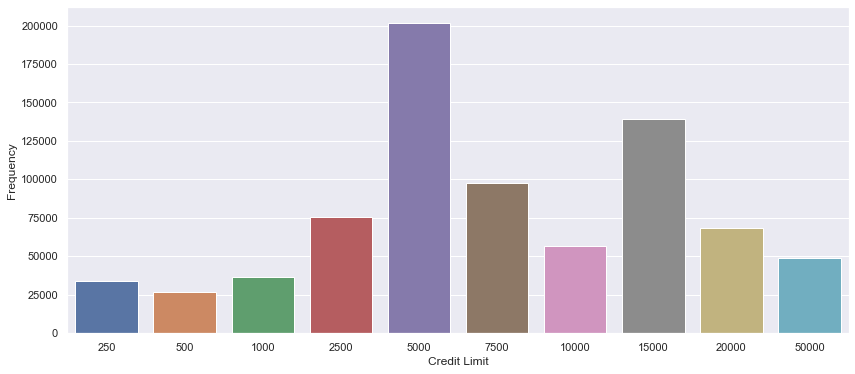

In [22]:
z = pd.DataFrame(transactions.groupby('creditLimit').count()['isFraud']).reset_index(drop=False)
z.columns = ['Credit Limit','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="Credit Limit", y="Frequency", data=z) # draw barplot
######## 调整字体大小，以及bar的颜色，增加title

In [23]:
Len_acqCountry = len(transactions['acqCountry'].unique())
acqCountry = transactions['acqCountry'].unique()
acqCountryValue = transactions['acqCountry'].value_counts()
print(acqCountry)
print(acqCountryValue)

['US' nan 'CAN' 'MEX' 'PR']
US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64


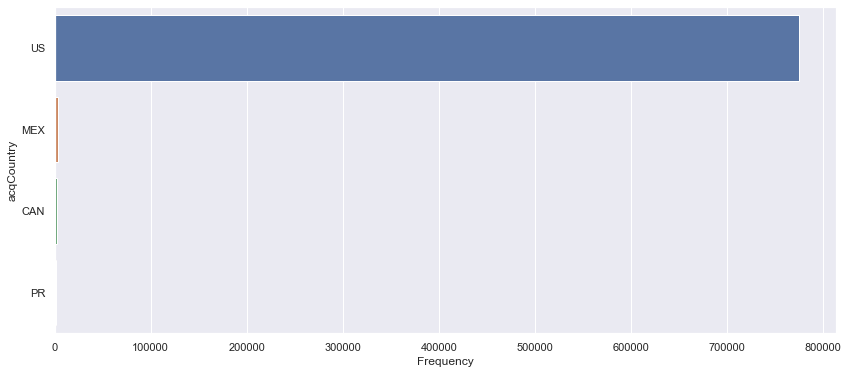

In [24]:
e=pd.DataFrame(transactions['acqCountry'].value_counts()).reset_index(drop=False)
e.columns=['acqCountry','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="Frequency", y="acqCountry", data=e) # draw barplot

In [25]:
Len_merchantCountryCode = len(transactions['merchantCountryCode'].unique())
merchantCountryCode = transactions['merchantCountryCode'].unique()
merchantCountryCodeValue = transactions['merchantCountryCode'].value_counts()
print(merchantCountryCode)
print(merchantCountryCodeValue)

# len(transactions['merchantCountryCode'].unique())

['US' 'CAN' nan 'PR' 'MEX']
US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64


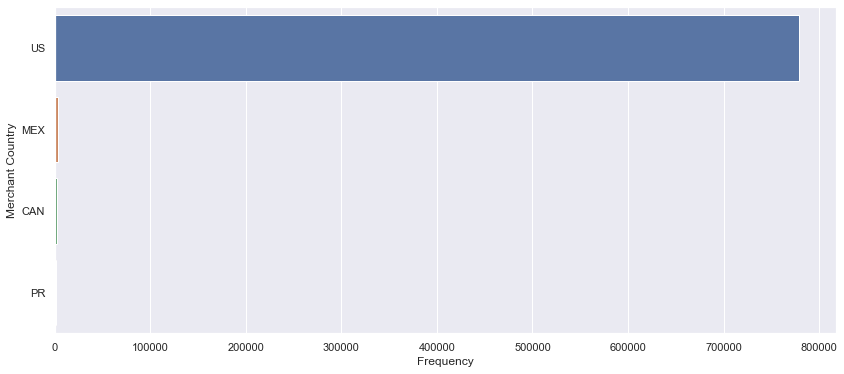

In [26]:
e = pd.DataFrame(transactions['merchantCountryCode'].value_counts()).reset_index(drop=False)
e.columns = ['Merchant Country','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="Frequency", y="Merchant Country", data=e) # draw barplot

In [27]:
Len_merchantCategoryCode = len(transactions['merchantCategoryCode'].unique())
merchantCategoryCode = transactions['merchantCategoryCode'].unique()
merchantCategoryCodeValue = transactions['merchantCategoryCode'].value_counts()
print(merchantCategoryCode)
print(merchantCategoryCodeValue)

# len(transactions['merchantCategoryCode'].unique())

['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64


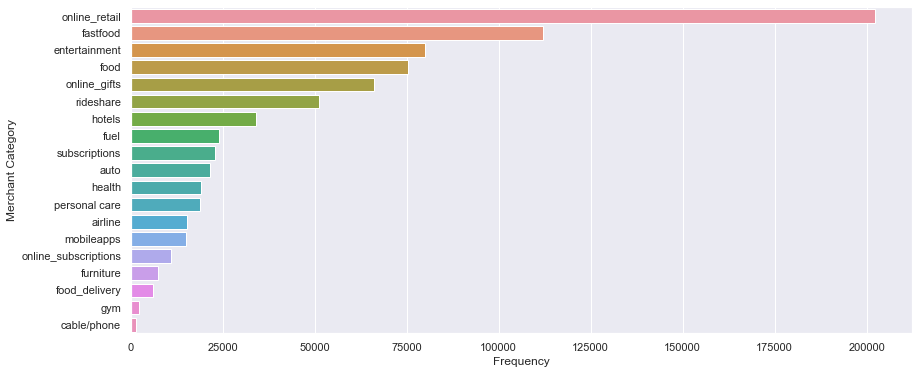

In [28]:
e=pd.DataFrame(transactions['merchantCategoryCode'].value_counts()).reset_index(drop=False)
e.columns=['Merchant Category','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="Frequency", y="Merchant Category", data=e) # draw barplot

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64


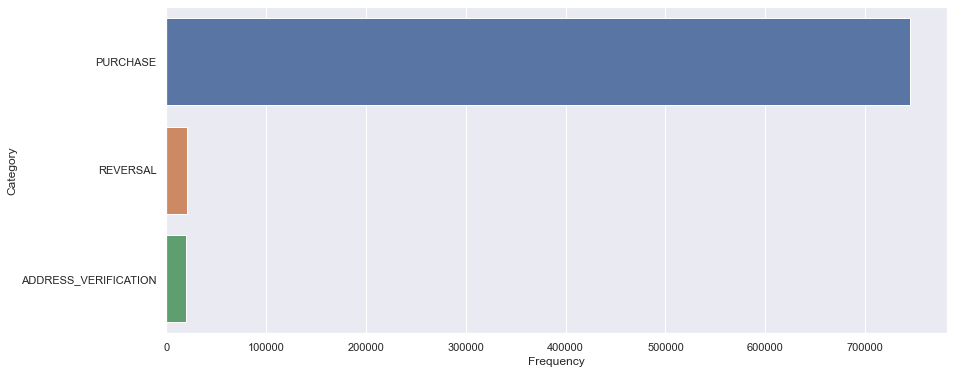

In [29]:
e=pd.DataFrame(transactions['transactionType'].value_counts()).reset_index(drop=False)
e.columns=['Category','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
sns.set_theme() # set theme
ax = sns.barplot(x="Frequency", y="Category", data=e) # draw barplot

transactionType = transactions['transactionType'].value_counts()
print(transactionType)

In [30]:
t = list(transactions['transactionAmount'])
#t.index(2011.540000)

index = transactions['creditLimit'][380125]
print(index)

50000


In [31]:
cust_length2=transactions.groupby(['customerId','merchantCategoryCode']).sum()['transactionAmount']
cust_length2=pd.DataFrame(cust_length2).reset_index()
cust_length2.columns=['customerId','merchantCategory','Amount']
cust_length2.head(10)

,customerId,merchantCategory,Amount
0,100088067,entertainment,1813.91
1,100088067,food,1502.84
2,100088067,fuel,446.63
3,100088067,mobileapps,31.68
4,100088067,online_gifts,3685.28
5,100088067,online_retail,548.00
6,100108752,fuel,813.75
7,100108752,rideshare,184.20
8,100328049,fastfood,7814.52
9,100328049,food,810.53


In [32]:
cust_length2=transactions.groupby(['customerId']).sum()['transactionAmount']
cust_length2=pd.DataFrame(cust_length2).reset_index()
cust_length2.columns=['customerId','Amount']
cust_length2.head(10)

,customerId,Amount
0,100088067,8028.34
1,100108752,997.95
2,100328049,11991.18
3,100663626,6422.27
4,100737756,30714.02
5,100947057,1204.51
6,101132326,10787.04
7,101339369,2151.81
8,101376441,7662.53
9,101380713,18338.10


In [38]:
cust_length=transactions.groupby(['customerId']).mean()['creditLimit']
cust_length=pd.DataFrame(cust_length).reset_index()
cust_length.columns=['customerId','Amount']
cust_length.head(10)

,customerId,Amount
0,100088067,50000.0
1,100108752,5000.0
2,100328049,5000.0
3,100663626,20000.0
4,100737756,250.0
5,100947057,1000.0
6,101132326,1000.0
7,101339369,2500.0
8,101376441,7500.0
9,101380713,10000.0


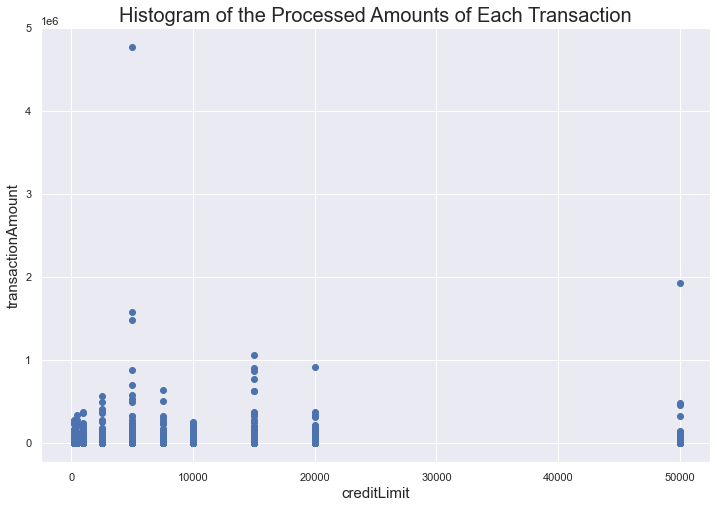

In [39]:
# There is no obvious relationship between credit limit and transactionAmount
plt.figure(figsize=(12, 8))
plt.plot(cust_length['Amount'], cust_length2['Amount'],'o', 50)

plt.title('Histogram of the Processed Amounts of Each Transaction', fontsize=20)
plt.xlabel('creditLimit', fontsize=15)
plt.ylabel('transactionAmount', fontsize=15)
plt.show()

In [35]:
cust_length=transactions.groupby(['customerId','merchantName']).count()['transactionDateTime']
cust_length=pd.DataFrame(cust_length).reset_index()
cust_length.columns=['customerId','merchantName','Count']
cust_length.head(100)

,customerId,merchantName,Count
0,100088067,1st BBQ,1
1,100088067,1st Pub,1
2,100088067,1st Sandwitch Bar #758805,1
3,100088067,34th BBQ #412895,1
4,100088067,AMC #191138,1
...,...,...,...
95,100328049,cheapfast.com,1
96,100328049,hulu.com,4
97,100328049,oldnavy.com,1
98,100328049,staples.com,1
